# 1.0 Introduction

## 1.1 Project Overview

The aviation industry is a critical sector that requires careful risk assessment due to the potential safety and financial implications of aircraft operations. As part of an expansion strategy the company is venturing into the aviation industry with plans to purchase and operate aircraft which are the lowest risk for the company for both commercial and private enterprises. 

However due to the lack of prior experience in this field, the company needs a thorough analysis of the data from the National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters in order to make informed decisions when purchasing the aircrafts.

This project aims to analyze aviation incident and accident data to determine which aircraft models pose the least risk. By using data-driven insights the company will be able to make strategic investment choices that prioritize safety and efficiency.

## 1.2 Business Understanding


**Business Problem**

The company is planning an expansion strategy by entering the aviation industry. However, the leadership lacks expertise in assessing the risks associated with different aircraft models. To ensure a safe and profitable entry into the market, the company must identify the safest most efficient aircrafts that have been shown historically to have less accidents or incidences over time .

Although aviation accidents are rare, when they do happen they have severe consequences including loss of life and economic damage.Understanding the factors that contribute to these accidents is crucial for the company to assess which aircraft models pose the least risk when purchasing. The primary goal of this analysis is to answer key questions such as:

- What are the most common causes of aviation accidents?
- How do weather conditions affect accident severity?
- Are there specific regions with higher accident occurrences?
- Are there specific time periods with higher accident occurrences?
- What aircraft manufacturers tend to have the least/most accidents over time?


**Project Objectives**

This project aims to:

- Perform exploratory data analysis (EDA) to identify trends and patterns in aviation accidents.

- Visualize accident data .

- Highlight key factors contributing to aviation incidents.

- Provide data-driven recommendations to ensure a safe and profitable entry into the market.

The findings from this project will be valuable to the company and safety regulators in implementing preventive measures to ensure a safe and profitable entry into the market.

# 2.0 Data Understanding

The data we have been provided is from the National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters.

## 2.1 Dataset Overview

We have two datasets provided in this project:

**1.AviationData.csv**

In [127]:
#importing pandas
import pandas as pd

#import the AviationData.csv dataset
avdata = pd.read_csv('./Data/AviationData.csv' , encoding= 'latin-1')

# display the 1st 5 elements of the data
avdata.head(5)

C:\Users\pc\AppData\Local\Temp\ipykernel_24816\1682299470.py:5: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  avdata = pd.read_csv('./Data/AviationData.csv' , encoding= 'latin-1')


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


This dataset contains records of aviation accidents, providing critical information on past incidents, aircraft types, causes, and other relevant details.


**2.USState_Codes.csv**

In [128]:
# load the USState_Codes.csv
statecodes = pd.read_csv('./Data/USState_Codes.csv' , encoding= 'latin-1')

# display the 1st 5 elements of the data
statecodes.head(5)

,US_State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


This dataset provides mappings of U.S. state abbreviations to their full names, which may be useful for geographical analysis of accident locations.

## 2.2 Data Dictionary

Here we shall define the key variables for the Datasets.

**1. AviationData.csv**

In [129]:
#check all column names of the dataset
avdata.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

- Event ID – A unique identifier for each accident.

- Investigation Type – Specifies whether the case is an "Accident" or an "Incident."

- Event Date – The date when the accident occurred.

- Location – The city or area where the event happened.

- Country – The country where the accident took place.

- Latitude & Longitude – Geographic coordinates of the accident site.

- Airport Code & Airport Name – If the accident occurred at or near an airport, these fields provide identifying information.

- Injury Severity – Describes the severity of the accident in terms of injuries and fatalities.

- Aircraft Category – Specifies whether the aircraft involved is commercial, private, military, etc.

- Make & Model – Details about the aircraft manufacturer and specific model.

- Number of Engines – Indicates how many engines the aircraft had.

- Engine Type – The type of engines used (e.g., turbofan, piston).

- Amateur Built – A yes/no field indicating whether the aircraft was home-built.

- Total Fatal Injuries, Serious Injuries, and Minor Injuries – Breakdown of casualties resulting from the accident.

- Aircraft Damage – Describes the extent of damage to the aircraft (e.g., destroyed, substantial).

- Cause Factors – May include information on what contributed to the accident.

**2.USState_Codes.csv**

In [130]:
#check all column names of the dataset
statecodes.columns

Index(['US_State', 'Abbreviation'], dtype='object')

- State – The full name of the U.S. state.
- Abbreviation – The two-letter state code.


## 2.3 Data Inspection

Here we shall be exploring the datasets to have better understanding about what we're working with. 

**Check the Dataset Shape (Rows & Columns)**

In [131]:
# AviationData.csv
avdata.shape

(88889, 31)

In [132]:
# USStatescodes
statecodes.shape

(62, 2)

**Display Column Names' Data Types**

In [133]:
avdata.dtypes

Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Latitude                   object
Longitude                  object
Airport.Code               object
Airport.Name               object
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
FAR.Description            object
Schedule                   object
Purpose.of.flight          object
Air.carrier                object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
Report.Status 

In [134]:
statecodes.dtypes

US_State        object
Abbreviation    object
dtype: object

**Identify Missing Values**

In [135]:
avdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [136]:
#Check the percentage of missing values per column 
100*(avdata.isnull().sum()/88889)

Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.058500
Country                    0.254250
Latitude                  61.320298
Longitude                 61.330423
Airport.Code              43.601570
Airport.Name              40.708074
Injury.Severity            1.124999
Aircraft.damage            3.593246
Aircraft.Category         63.677170
Registration.Number        1.554748
Make                       0.070875
Model                      0.103500
Amateur.Built              0.114750
Number.of.Engines          6.844491
Engine.Type                7.982990
FAR.Description           63.974170
Schedule                  85.845268
Purpose.of.flight          6.965991
Air.carrier               81.271023
Total.Fatal.Injuries      12.826109
Total.Serious.Injuries    14.073732
Total.Minor.Injuries      13.424608
Total.Uninjured            6.650992
Weather.Condition          5

In [137]:
statecodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   US_State      62 non-null     object
 1   Abbreviation  62 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB


From this analysis we can see that the statecodes dataset does not have missing values whereas some of the columns in the AviationData.csv have a large percent of missing values which we have to handle.


**Check for Duplicates**

In [138]:
# find the duplicate entries in the AviationData.csv
avdata.duplicated().sum()

#Drop duplicated entries
avdata.drop_duplicates()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [139]:
# find the duplicate entries in the USStatescodes.csv
statecodes.duplicated().sum()

0

Both datasets seem to contain no duplicated entries.

# 3.0 Data Preparation

From the data inspection analysis above we can see that majority of the problem with the dataset lies in missing values. We have to manage these missing values to prevent inaccurate findings/errors as we proceed further.

In [140]:
#lets begin by converting the column names to consistent lower case
avdata.columns = avdata.columns.str.lower()

## 3.1 Handling missing values

**Drop Columns with Excessive Missing Values**

Some of these columns have a large percent of missing values as outlined in the Data understanding category.columns such as:

- FAR.Description (63.97%)
- Schedule (85.85%)
- Air.carrier (81.27%)

 Since these columns have very high missing values, retaining them may introduce bias or provide little insight.

In [141]:
# Drop columns with high missing values
columns_to_drop = ["far.description", "schedule", "air.carrier"]
avdata.drop(columns=columns_to_drop, inplace=True)

# Display remaining columns
print(avdata.columns)

Index(['event.id', 'investigation.type', 'accident.number', 'event.date',
       'location', 'country', 'latitude', 'longitude', 'airport.code',
       'airport.name', 'injury.severity', 'aircraft.damage',
       'aircraft.category', 'registration.number', 'make', 'model',
       'amateur.built', 'number.of.engines', 'engine.type',
       'purpose.of.flight', 'total.fatal.injuries', 'total.serious.injuries',
       'total.minor.injuries', 'total.uninjured', 'weather.condition',
       'broad.phase.of.flight', 'report.status', 'publication.date'],
      dtype='object')


**Filling Missing Values**

For columns that are important but have missing values, we can fill them using statistical methods.

In [142]:
#Fill with the most common number of engines
avdata["number.of.engines"].fillna(avdata["number.of.engines"].mode()[0], inplace=True)

In [143]:
#Fill missing values with 0 for some of the columns(we are assuming that no injuries were reported).
avdata["total.fatal.injuries"].fillna(0, inplace=True)
avdata["total.uninjured"].fillna(0, inplace=True)
avdata["total.serious.injuries"].fillna(0, inplace=True)
avdata["total.minor.injuries"].fillna(0, inplace=True)
avdata["total.fatal.injuries"].fillna(0, inplace=True)
avdata["longitude"].fillna(0, inplace=True)
avdata["latitude"].fillna(0, inplace=True)

#For the categorical data we can fill the missing values with Unknown and some with mode broad.phase.of.flight 
avdata["country"].fillna(avdata["country"].mode()[0], inplace=True)
avdata["location"].fillna(avdata["location"].mode()[0], inplace=True)
avdata["aircraft.damage"].fillna(avdata["aircraft.damage"].mode()[0], inplace=True)
avdata["weather.condition"].fillna(avdata["weather.condition"].mode()[0], inplace=True)
avdata["aircraft.category"].fillna("Unknown", inplace=True)
avdata["broad.phase.of.flight"].fillna(avdata["broad.phase.of.flight"].mode()[0], inplace=True)
avdata["aircraft.category"].fillna("Unknown", inplace=True)
avdata["purpose.of.flight"].fillna(avdata["purpose.of.flight"].mode()[0], inplace=True)
avdata["engine.type"].fillna(avdata["engine.type"].mode()[0], inplace=True)
avdata["amateur.built"].fillna(avdata["amateur.built"].mode()[0], inplace=True)

avdata.head(10)


,event.id,investigation.type,accident.number,event.date,location,country,latitude,longitude,airport.code,airport.name,...,engine.type,purpose.of.flight,total.fatal.injuries,total.serious.injuries,total.minor.injuries,total.uninjured,weather.condition,broad.phase.of.flight,report.status,publication.date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,0,0,NaN,NaN,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,0,0,NaN,NaN,...,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Reciprocating,Personal,3.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,0,0,NaN,NaN,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,0,0,NaN,NaN,...,Reciprocating,Personal,1.0,2.0,0.0,0.0,VMC,Approach,Probable Cause,16-04-1980
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,...,Turbo Fan,Personal,0.0,0.0,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,0,0,NaN,NaN,...,Reciprocating,Personal,4.0,0.0,0.0,0.0,IMC,Unknown,Probable Cause,06-11-2001
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,0,0,NaN,BLACKBURN AG STRIP,...,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,0,0,N58,HANOVER,...,Reciprocating,Business,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982
9,20020909X01560,Accident,MIA82DA029,1982-01-01,"JACKSONVILLE, FL",United States,0,0,JAX,JACKSONVILLE INTL,...,Reciprocating,Personal,0.0,0.0,3.0,0.0,IMC,Cruise,Probable Cause,01-01-1982


**Fix Data Types for Other Columns**

In [144]:
#Converting some of the comlumns from float to integers 
columns_to_int = ["total.fatal.injuries", "total.serious.injuries", "total.minor.injuries", "total.uninjured"]

# Convert the columns to integers
avdata[columns_to_int] = avdata[columns_to_int].astype(int)

#The dates are objects instead of proper datetime types.
avdata["event.date"] = pd.to_datetime(avdata["event.date"])
avdata["publication.date"] = pd.to_datetime(avdata["publication.date"], dayfirst=True)


In [145]:
# confirm data types and missing values.
avdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   event.id                88889 non-null  object        
 1   investigation.type      88889 non-null  object        
 2   accident.number         88889 non-null  object        
 3   event.date              88889 non-null  datetime64[ns]
 4   location                88889 non-null  object        
 5   country                 88889 non-null  object        
 6   latitude                88889 non-null  object        
 7   longitude               88889 non-null  object        
 8   airport.code            50132 non-null  object        
 9   airport.name            52704 non-null  object        
 10  injury.severity         87889 non-null  object        
 11  aircraft.damage         88889 non-null  object        
 12  aircraft.category       88889 non-null  object

With this Data preparation stage we have cleaned and structured the dataset in a way to improve accuracy and maintain consistency all through the data.We handled missing values, standardized column names, and converted relevant fields to appropriate data types. With the dataset clean and ready we can proceed to the next stage data analysis where we can find and draw more insight about the dataset.

# 4.0 Data Analysis

In this section our goal is to analyse the dataset to find and discover patterns, trends and insight related to the Aviation space. Our key objectives are as follows:

- Exploratory Data Analysis (EDA)
- Trend analysis.(Are there any outling trends that we should know about?)
- 

## 4.1 Exploratory Data Analysis (EDA)

**Univariate Analysis**

For this , we shall explore the data per variable/column to see if we can find some meaningful insight from it.

In [146]:
#lets begin by checking the most common make of aircrafts tends to have the most accidents/incidences
avdata['make'].value_counts().head(10)

make
Cessna     22227
Piper      12029
CESSNA      4922
Beech       4330
PIPER       2841
Bell        2134
Boeing      1594
BOEING      1151
Grumman     1094
Mooney      1092
Name: count, dtype: int64

In [147]:
#lets begin by checking the most common make of aircrafts tends to have the least accidents/incidences
avdata['make'].value_counts().tail(10)

make
Gideon              1
Brault              1
Baldwin             1
Kirchner            1
1977 Colfer-chan    1
Leonard Walters     1
Maule Air Inc.      1
Motley Vans         1
Perlick             1
ROYSE RALPH L       1
Name: count, dtype: int64

In [148]:
#Lets check what aircraft type tends to have more accidents/incidences
avdata['aircraft.category'].value_counts()

aircraft.category
Unknown              56616
Airplane             27617
Helicopter            3440
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
Rocket                   1
ULTR                     1
Name: count, dtype: int64

In [149]:
#Let us check at what phase of the flight did most accidents/incidences occur
avdata['broad.phase.of.flight'].value_counts()

broad.phase.of.flight
Landing        42593
Takeoff        12493
Cruise         10269
Maneuvering     8144
Approach        6546
Climb           2034
Taxi            1958
Descent         1887
Go-around       1353
Standing         945
Unknown          548
Other            119
Name: count, dtype: int64

In [150]:
#Lets also analyse what engine type is more common to have incidents/accidents
avdata['engine.type'].value_counts()

engine.type
Reciprocating      76626
Turbo Shaft         3609
Turbo Prop          3391
Turbo Fan           2481
Unknown             2051
Turbo Jet            703
Geared Turbofan       12
Electric              10
LR                     2
NONE                   2
Hybrid Rocket          1
UNK                    1
Name: count, dtype: int64

In [151]:
#Lets check how many accidents to incidences were recorded
avdata['investigation.type'].value_counts()

investigation.type
Accident    85015
Incident     3874
Name: count, dtype: int64

In [152]:
#What was the purpose of most flights?
avdata['purpose.of.flight'].value_counts().head(10)

purpose.of.flight
Personal              55640
Instructional         10601
Unknown                6802
Aerial Application     4712
Business               4018
Positioning            1646
Other Work Use         1264
Ferry                   812
Aerial Observation      794
Public Aircraft         720
Name: count, dtype: int64

In [153]:
#What weather condition was most common during the accidents?
#It looks like "UNK" and "Unk" might be duplicates due to inconsistent capitalization.
avdata['weather.condition'] = avdata['weather.condition'].str.lower()
avdata['weather.condition'].value_counts()


weather.condition
vmc    81795
imc     5976
unk     1118
Name: count, dtype: int64

In [154]:
# what is the average number of total fatal injuries?
print(avdata['total.fatal.injuries'].mean().round(0))

1.0


In [155]:
# what is the average number of total.serious.injuries?
print(avdata['total.serious.injuries'].mean())

0.24049094938631327


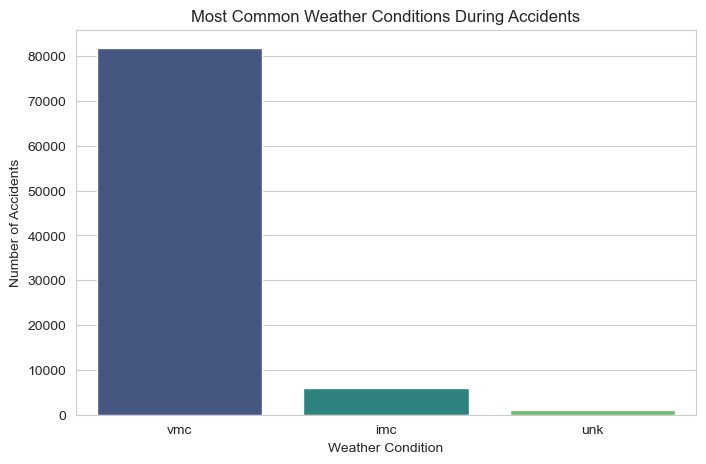

In [156]:
#Lets make some visualizations for some of these Univariate analysis
#What weather condition was most common during the accidents?

#import the necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each weather condition
weather_counts = avdata["weather.condition"].value_counts()

# Set figure size and style
plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")

# Plot bar chart
sns.barplot(x=weather_counts.index, y=weather_counts.values, palette="viridis")

# Labels and title
plt.xlabel("Weather Condition")
plt.ylabel("Number of Accidents")
plt.title("Most Common Weather Conditions During Accidents")

# Show plot
plt.show()

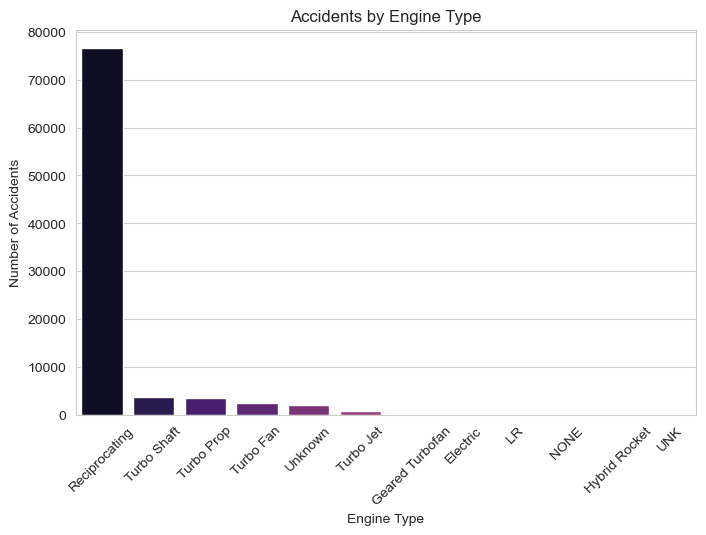

In [157]:
#what engine type is more common to have incidents/accidents
# Count occurrences of each engine type
engine_counts = avdata["engine.type"].value_counts()

# Set figure size and style
plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")

# Plot bar chart
sns.barplot(x=engine_counts.index, y=engine_counts.values, palette="magma")

# Labels and title
plt.xlabel("Engine Type")
plt.ylabel("Number of Accidents")
plt.title("Accidents by Engine Type")
plt.xticks(rotation=45)  # Rotate labels for better readability

# Show plot
plt.show()

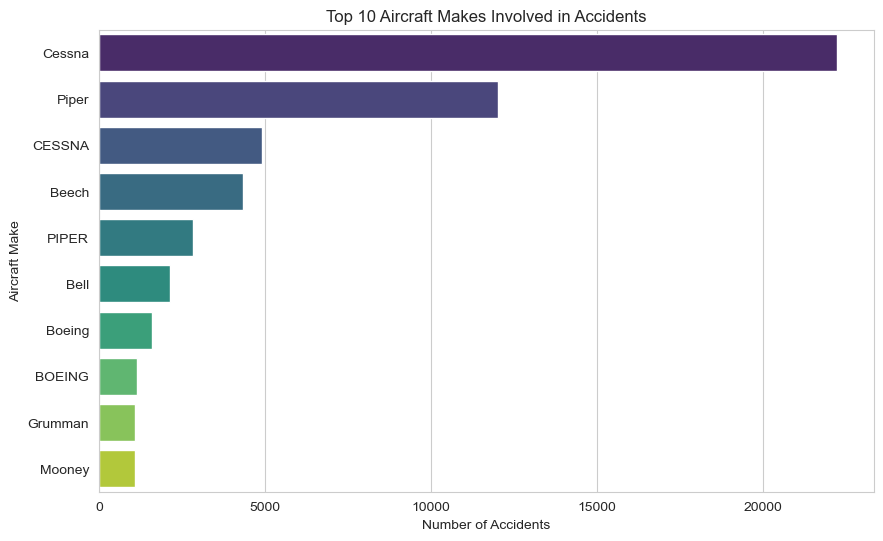

In [158]:
#the top 10 most common make of aircrafts tends to have the most accidents/incidences
# Count occurrences of each aircraft make
top_makes = avdata["make"].value_counts().nlargest(10)

# Set figure size and style
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Plot bar chart
sns.barplot(x=top_makes.values, y=top_makes.index, palette="viridis")

# Labels and title
plt.xlabel("Number of Accidents")
plt.ylabel("Aircraft Make")
plt.title("Top 10 Aircraft Makes Involved in Accidents")

# Show plot
plt.show()

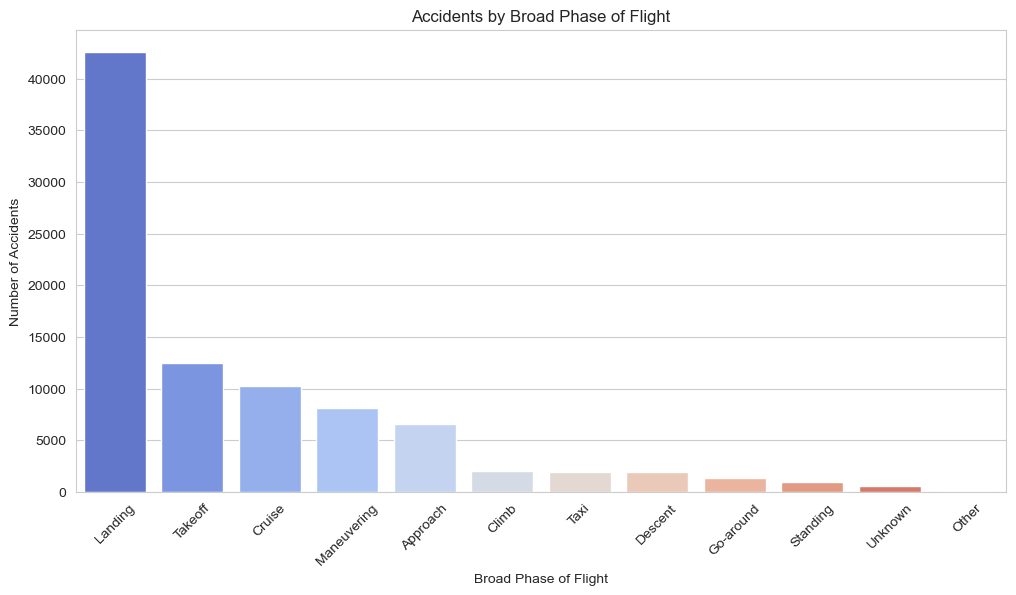

In [159]:
#what phase of the flight did most accidents/incidences occur
# Count occurrences of each broad phase of flight
phase_counts = avdata["broad.phase.of.flight"].value_counts()

# Set figure size and style
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Plot bar chart
sns.barplot(x=phase_counts.index, y=phase_counts.values, palette="coolwarm")

# Labels and title
plt.xlabel("Broad Phase of Flight")
plt.ylabel("Number of Accidents")
plt.title("Accidents by Broad Phase of Flight")
plt.xticks(rotation=45)

# Show plot
plt.show()

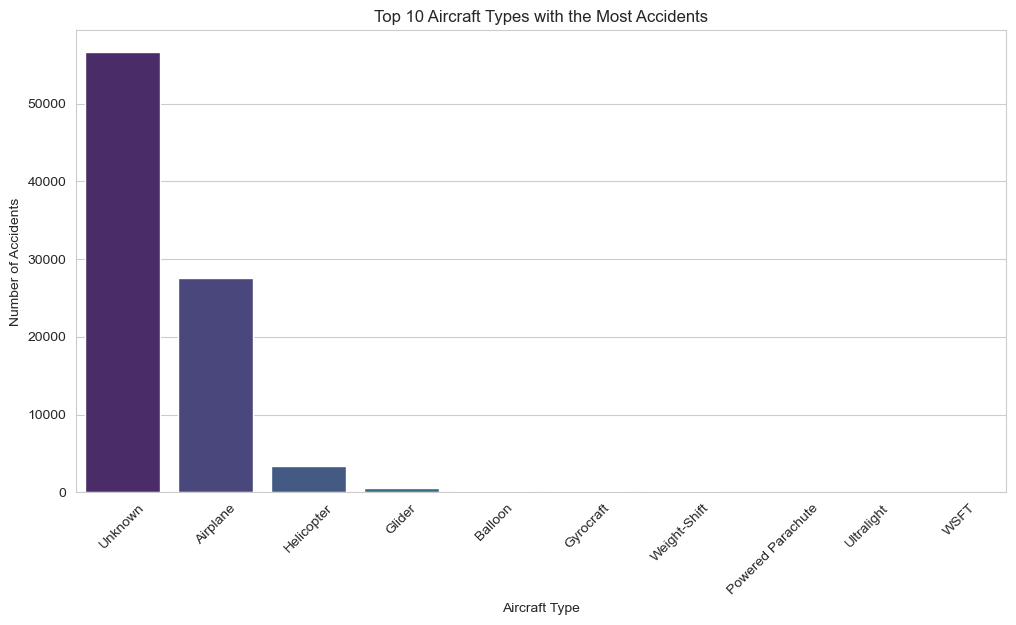

In [160]:
#what aircraft type tends to have more accidents/incidences
# Count occurrences of each aircraft type
aircraft_counts = avdata["aircraft.category"].value_counts().head(10)  # Top 10

# Set figure size and style
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Plot bar chart
sns.barplot(x=aircraft_counts.index, y=aircraft_counts.values, palette="viridis")

# Labels and title
plt.xlabel("Aircraft Type")
plt.ylabel("Number of Accidents")
plt.title("Top 10 Aircraft Types with the Most Accidents")
plt.xticks(rotation=45)

# Show plot
plt.show()

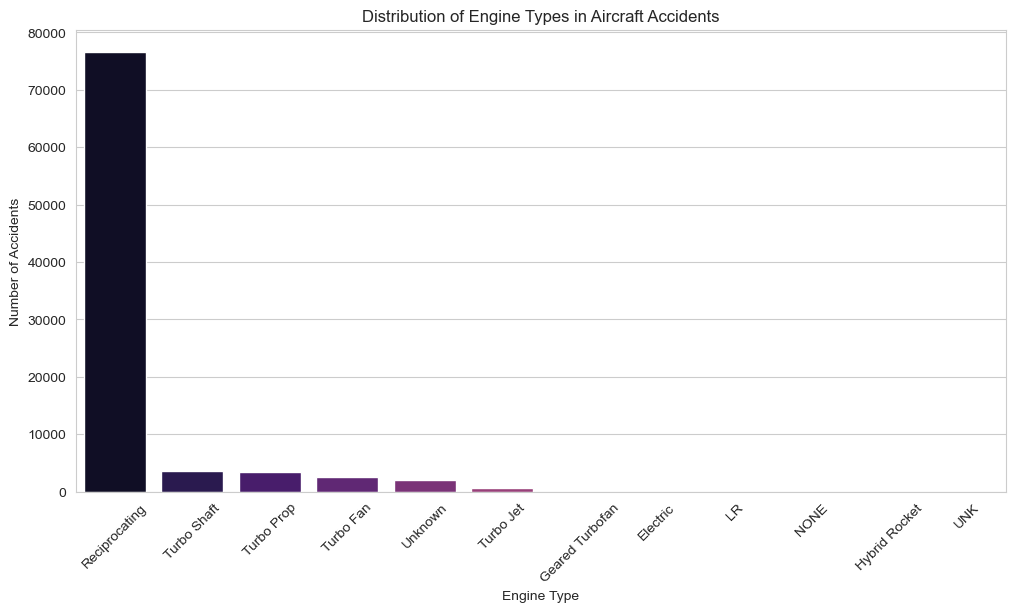

In [161]:
#what engine type is more common to have incidents/accidents
# Count occurrences of each engine type
engine_counts = avdata["engine.type"].value_counts()

# Set figure size and style
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Plot bar chart
sns.barplot(x=engine_counts.index, y=engine_counts.values, palette="magma")

# Labels and title
plt.xlabel("Engine Type")
plt.ylabel("Number of Accidents")
plt.title("Distribution of Engine Types in Aircraft Accidents")
plt.xticks(rotation=45)

# Show plot
plt.show()

**Bivariate Analysis**

Here we shall be using data analysis to explore and compare two variables in the dataset to see whether we can draw meaningful insight from the data .

In [162]:
# I have decided to create a column 'casualties' to create a single metric that represents the total human impact of each accident.
avdata["casualties"] = (
    avdata["total.fatal.injuries"].fillna(0) + 
    avdata["total.serious.injuries"].fillna(0) + 
    avdata["total.minor.injuries"].fillna(0)
)


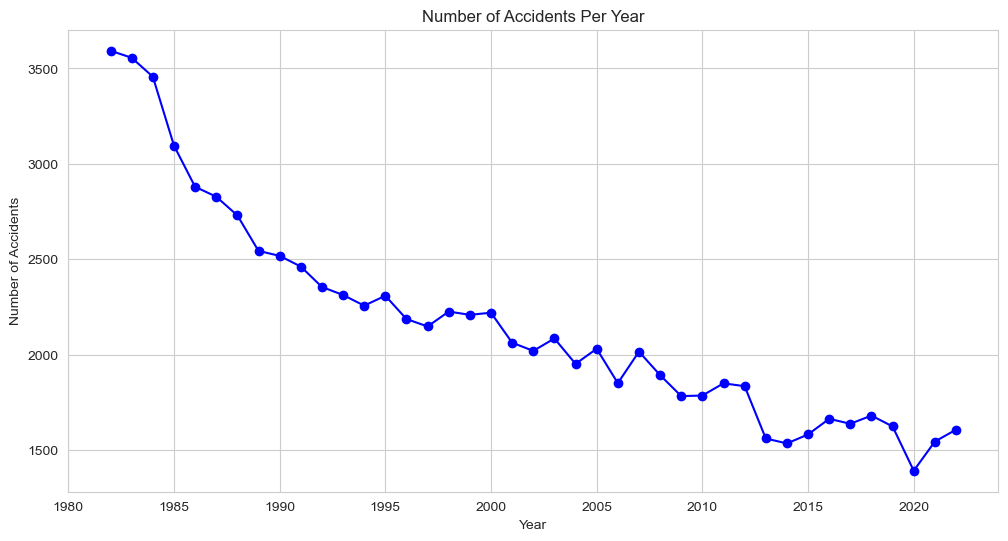

In [163]:
# Lets see whether are accidents increasing or decreasing over time?
# Extract year from event.date
avdata["year"] = avdata["event.date"].dt.year

# Count accidents per year
accidents_per_year_count = avdata["year"].value_counts().sort_index()
# Filter out years with fewer than 10 accidents
accidents_per_year = accidents_per_year_count[accidents_per_year_count >= 10]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(accidents_per_year.index, accidents_per_year.values, marker='o', linestyle='-', color='b')

# Labels and title
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.title("Number of Accidents Per Year")
plt.grid(True)

# Show plot
plt.show()

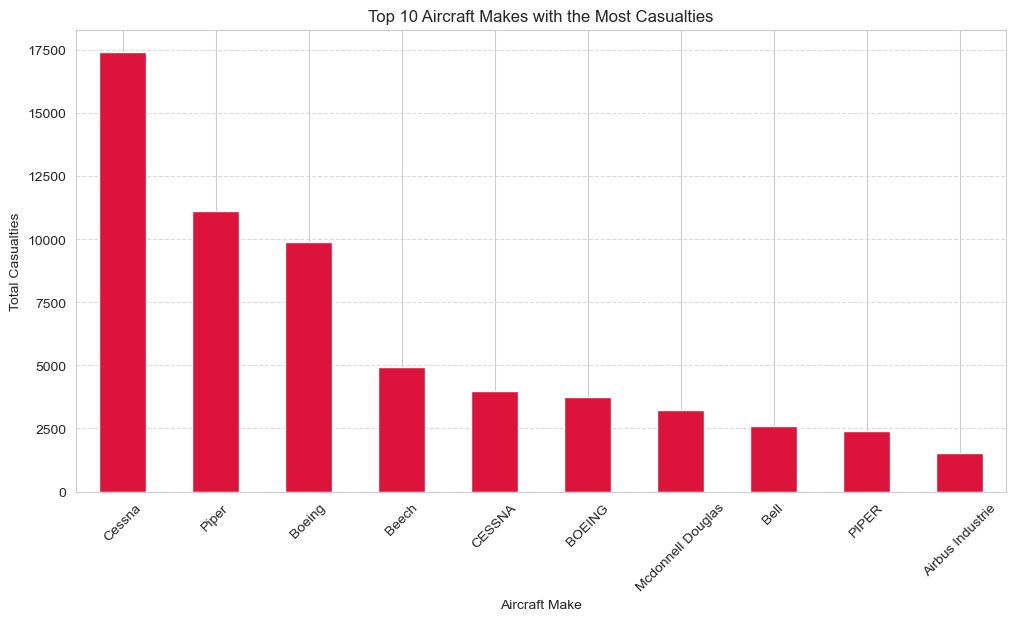

In [164]:
#Lets now see the top aircraft makes with the highest number of casualties

# Group by 'make' and sum casualties, then sort in descending order
top_makes = avdata.groupby("make")["casualties"].sum().sort_values(ascending=False).head(10)

# Plot the bar chart
plt.figure(figsize=(12, 6))
top_makes.plot(kind='bar', color='crimson')

# Labels and title
plt.xlabel("Aircraft Make")
plt.ylabel("Total Casualties")
plt.title("Top 10 Aircraft Makes with the Most Casualties")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

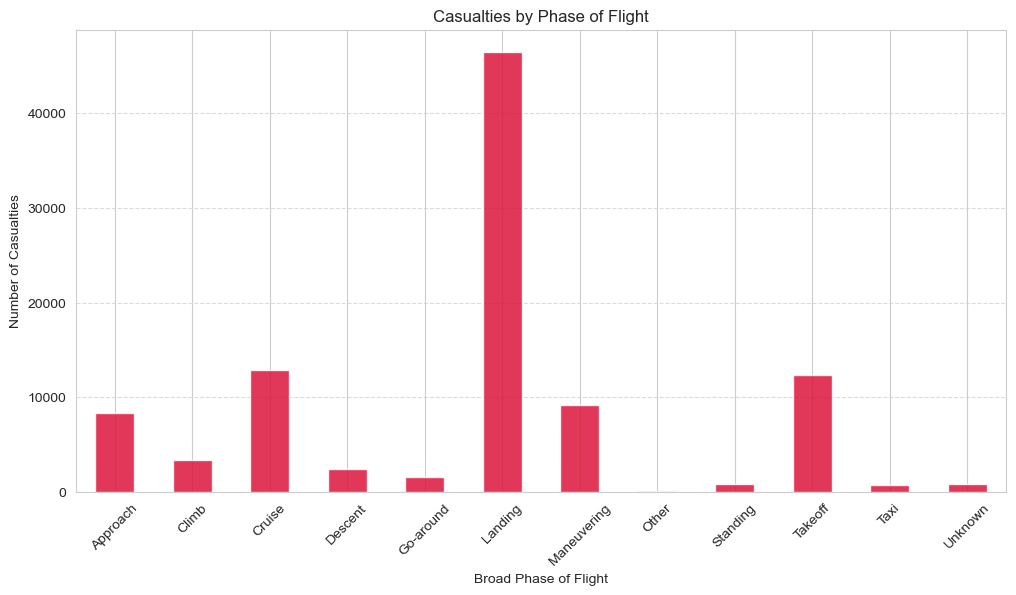

In [165]:
# broad.phase.of.flight vs. casualties

# Grouping data by phase of flight and summing up casualties
phase_casualties = avdata.groupby("broad.phase.of.flight")["casualties"].sum()

# Plot stacked bar chart
plt.figure(figsize=(12, 6))
phase_casualties.plot(kind="bar", color="crimson", alpha=0.85)

# Labels and title
plt.xlabel("Broad Phase of Flight")
plt.ylabel("Number of Casualties")
plt.title("Casualties by Phase of Flight")
plt.xticks(rotation=45)  # Rotate labels for readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

In [166]:
# I want to establish which models have the most casualties together with knowing which make it is from.
# Group by 'model' and sum casualties
model_casualties = avdata.groupby(["model", "make"])["casualties"].sum()
# Get top 10 models with the highest casualties
top_models = model_casualties.sort_values(ascending=False).head(10)
top_models

model      make  
737        BOEING    1804
737-200    Boeing    1064
152        Cessna     922
PA-28-140  Piper      877
172N       Cessna     835
172        Cessna     748
PA-28-181  Piper      642
172M       Cessna     561
206B       Bell       537
777 - 206  BOEING     534
Name: casualties, dtype: int32

In [167]:
# I want to establish which models have the least casualties together with knowing which make it is from.
# Group by 'model' and sum casualties
model_casualties = avdata.groupby(["model", "make"])["casualties"].sum()
# Get top 10 models with the highest casualties
least_models = (model_casualties).sort_values(ascending=True).head(20) 
least_models

model            make                   
&GCBC            Champion                   0
INTERSTATE S1B1  Artic Aircraft Corp.       0
INTL S-2R        Rockwell                   0
IS-28B2          I.c.a. Brasov - Romania    0
                 I.c.a.-brasov              0
IS-2902          I.c.a. Brasov              0
IS-29D2          ICA BRASOV                 0
IS28B2           Lark Aviation              0
IT               Pietsch                    0
IV               Avid Aircraft              0
                 Kit Fox                    0
IV LANCAIR       Bognuda Livio              0
IV-1200          Kilpatrick                 0
IV-P             GARRATT MANSFIELD W        0
IVP              Lancair                    0
J-2              Mccullough                 0
                 TAYLOR                     0
                 Taylorcraft                0
INTERSTATE S-4   Diehl                      0
J-3              PIPER                      0
Name: casualties, dtype: int32

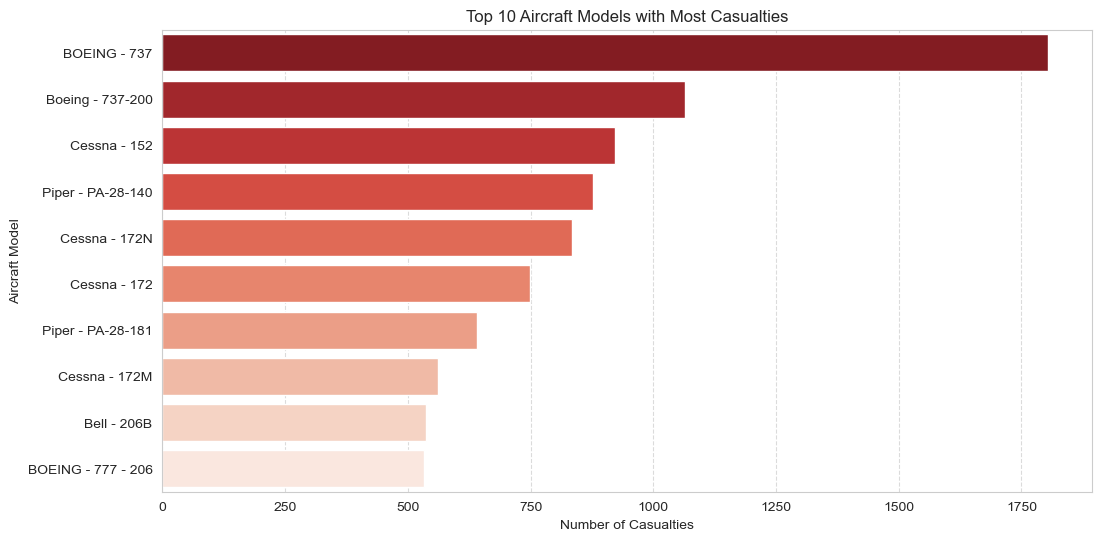

In [168]:
# Reset index to get 'model' and 'make' as columns
top_models_df = top_models.reset_index()

# Create a new column combining make and model for better labeling
top_models_df["Make & Model"] = top_models_df["make"] + " - " + top_models_df["model"]

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_models_df["casualties"],y=top_models_df["Make & Model"],palette="Reds_r")

# Labels and title
plt.xlabel("Number of Casualties")
plt.ylabel("Aircraft Model")
plt.title("Top 10 Aircraft Models with Most Casualties")
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Show plot
plt.show()

In [169]:
# Export the cleaned dataset to a CSV file ready for tableau
avdata.to_csv("cleaned_aircraft_data.csv", index=False)

# 5.0 Conclusion and Recommendations

## 5.1 Business Reccomendation

In evaluating the risks associated with aircraft operations, we analyzed historical aviation accident data to identify patterns and insights that can inform your company’s entry into the aviation industry. Our primary objective was to determine the lowest-risk aircraft models for commercial and private operations, helping mitigate potential financial and safety concerns.

Through data analysis and visualization, we examined key factors such as accident frequency, casualties, aircraft make and model, and the influence of external conditions like weather and flight phase. The following recommendations are based on data-driven insights and will guide strategic decision-making in aircraft selection.

**1. Avoid High-Risk Aircraft Types**

Our analysis discovered some aircraft types and manufacturers with a higher rate of association of accidents and deaths. These types of aircraft are exhibiting patterns of higher risk for a variety of reasons, such as design failures, operational issues, or trends of accident incidence. Investing in these high-risk aircraft can mean higher maintenance costs, higher premiums, and increased exposure to safety liabilities. Such of these aircrafts include:

- 737        BOEING    1804 casualties
- 737-200    Boeing    1064 casualties
- 152        Cessna     922 casualties
- PA-28-140  Piper      877 casualties
- 172N       Cessna     835 casualties
- 172        Cessna     748 casualties
- PA-28-181  Piper      642 casualties
- 172M       Cessna     561 casualties
- 206B       Bell       537 casualties
- 777 - 206  BOEING     534 casualties

    


**2.Select Aircraft Models with the Lowest Risk**

The firm should give priority to aircraft models with a high safety history, low rates of accidents, and fewer fatalities. This can be achieved by giving priority to manufacturers with a reliability history, buying newer planes with extra safety features, and ensuring aircraft have undergone tough testing under regulatory oversight. Some of the aircrafts with the lowest accident/incident count include:

- &GCBC            Champion                   
- INTERSTATE S1B1  Artic Aircraft Corp.       
- INTL S-2R        Rockwell                   
- IS-28B2          I.c.a. Brasov - Romania    
- IS-2902          I.c.a. Brasov              
- IS-29D2          ICA BRASOV                 
- IS28B2           Lark Aviation              
- IT               Pietsch                    
- IV               Avid Aircraft              


**3.Consider the Phase of Flight in Risk Management**

Our analysis of accidents by flight phases indicates that certain flight phases are associated with a higher number of casualties. These flight phases are particularly dangerous due to factors such as human error, mechanical malfunction, and poor weather conditions. Hazards in these risky flight phases can be significantly reduced by investing in airplanes with more advanced levels of automation, stability control systems, and better pilot-assist technologies.

In addition, pilot training programs must emphasize emergency reaction and situational awareness in such extreme conditions. Rendering aircraft fitted with modern navigation and safety gear will increase survivability and reduce casualties, making operations safer and more reliable.

**4.Prioritize Safer Engine Types in Aircraft Selection.**

Our research shows that the category of aircraft engine is a significant factor in accident rate and severity. Failure occurs more frequently in certain types of engines, and consequently, there are more accidents and deaths. Having knowledge of which engines are riskier will allow us to make better decisions when we select airplanes to be in our fleet. We should prioritize purchasing aircrafts with engines with less records of accidents such as turbo jet, turbo prop and turbo fan. 

## 5.2 Limitations.


All in all, the dataset that we are working with from the National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters, is not 100% accurate due to some of the factors outlined below:


- Data Completeness – Some aircraft incidents are underreported or missing key information, affecting the accuracy of risk assessment.

- Outliers & Bias – Zero-accident aircraft are part of the data set and may skew risk assessment. Older aircraft models can also have more historical data than newer models, which can cause bias.

- Inadequate Operational Context – Analysis overlooks operational variabilities, such as aircraft maintenance quality, pilot experience, or environmental factors, which have a significant role in influencing the accident rate.

- Risk Generalization – Analysis focuses on historical accident rates and does not consider future technology changes or rule implementation that could influence aircraft safety.

- Engine Type Impact – While certain engine types are more risk-prone, the dataset could not possibly account for variations in maintenance culture and technological advancements that mitigate such risks.

## 5.3 Conclusion

This analysis provides critical insights into aircraft safety that will allow the company to make informed decisions when it enters the aviation industry. By identifying dangerous aircraft models, reviewing accident trends by flight phase, and considering the impact of engine types, we have identified major determinants of aviation safety.

Recommendations highlight the value of prioritizing low-risk aircraft, maintaining safety in critical phases of flight, and selecting reliable engine types. While useful advice is offered by the analysis, its limitations—data completeness, operating environment, and technological advancements—should be remembered when business decisions are made.

In the future, inclusion of real-time safety reporting, maintenance records, and pilot training records would assist in further refining risk assessment and improving operational safety while ensuring the company's success.